In [605]:
import pandas as pd
import numpy as np
import re
import missingno as msno
import math
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from pathlib import Path  

In [606]:
df = pd.read_csv(r'C:\Users\admind\Downloads\DuDoanGiaKhachSan\DuDoanGiaKhachSan\hotel_test.csv')
table = tabulate(df, headers='keys', tablefmt='fancy_grid')
print(table)

╒══════╤═══════════╤═════════╤═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤════════════════╤════════════════════════════╤═════════╤═══════════════════════╤═══════════════════════════════╤════════════════════════╤════════════╤══════════════════╤═════════════════╤═══════════════════╤══════════════════╤═══════════════╤═════════╕
│      │ Country   │ Place   │ Name                                                                                                                                                                            │ Price          │ Tax                        │   Stars │ Distance              │ Number_of_review              │ Sustainable_level      │ Discount   │ Free_Breakfast   │ is_Prepayment   │ is_NotablePlace   │ is_Free_Cancel   │ is_Sold_Out   │ Point   │
╞══════╪═══════════╪═════════╪════════════════════════════════════════════════

In [607]:
ds_rows, ds_cols = df.shape
print(f'Số hàng: {ds_rows}\nSố cột: {ds_cols}')

Số hàng: 6458
Số cột: 16


In [608]:
print(df.nunique())

Country                 1
Place                   1
Name                 1086
Price                2201
Tax                   138
Stars                   5
Distance              131
Number_of_review      437
Sustainable_level       3
Discount                2
Free_Breakfast          2
is_Prepayment           2
is_NotablePlace         2
is_Free_Cancel          2
is_Sold_Out             2
Point                  48
dtype: int64


In [609]:
num_duplicated_rows = df.duplicated().sum()
is_duplicated = (num_duplicated_rows != 0)
print('So dong lap la {}'.format(num_duplicated_rows))
print(is_duplicated)

So dong lap la 2824
True


In [610]:
df = df.drop_duplicates()
print(df)

       Country   Place                                               Name  \
0     Viet Nam  Hà Nội                          Sun Clover Boutique Hotel   
1     Viet Nam  Hà Nội           Hanoi Center Silk Classic Hotel & Travel   
2     Viet Nam  Hà Nội               Hanoi L'Heritage Diamond Hotel & Spa   
3     Viet Nam  Hà Nội                                 Golden Villa Hotel   
4     Viet Nam  Hà Nội          22Land Residence Hotel & Spa 52 Ngo Huyen   
...        ...     ...                                                ...   
6444  Viet Nam  Hà Nội                           Hanoi Central Star Hotel   
6445  Viet Nam  Hà Nội                       May - DUPLEX SKY VIEW 01 - 3   
6446  Viet Nam  Hà Nội  Summer House - Vinhomes Dcapital Tran Duy Hung...   
6447  Viet Nam  Hà Nội                             Vitamin Home West Lake   
6457  Viet Nam  Hà Nội                  Ruby Serviced Apartment Liễu Giai   

              Price                     Tax  Stars              Distance  \

In [611]:
num_duplicated_rows = df.duplicated().sum()
is_duplicated = (num_duplicated_rows != 0)
print('So dong lap la {}'.format(num_duplicated_rows))
print(is_duplicated)

So dong lap la 0
False


In [612]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3634 entries, 0 to 6457
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            3634 non-null   object 
 1   Place              3634 non-null   object 
 2   Name               3634 non-null   object 
 3   Price              3634 non-null   object 
 4   Tax                3634 non-null   object 
 5   Stars              2499 non-null   float64
 6   Distance           3634 non-null   object 
 7   Number_of_review   3394 non-null   object 
 8   Sustainable_level  1319 non-null   object 
 9   Discount           3634 non-null   bool   
 10  Free_Breakfast     3634 non-null   bool   
 11  is_Prepayment      3634 non-null   bool   
 12  is_NotablePlace    3634 non-null   bool   
 13  is_Free_Cancel     3634 non-null   bool   
 14  is_Sold_Out        3634 non-null   bool   
 15  Point              3378 non-null   object 
dtypes: bool(6), float64(1), 

In [613]:
num_NaN = df['Price'].isnull().sum()
num_NaN

0

In [614]:
#Đếm số lượng giá trị thiếu (NaN) trong cột
num_NaN = df['Stars'].isnull().sum()
num_NaN

1135

<AxesSubplot:>

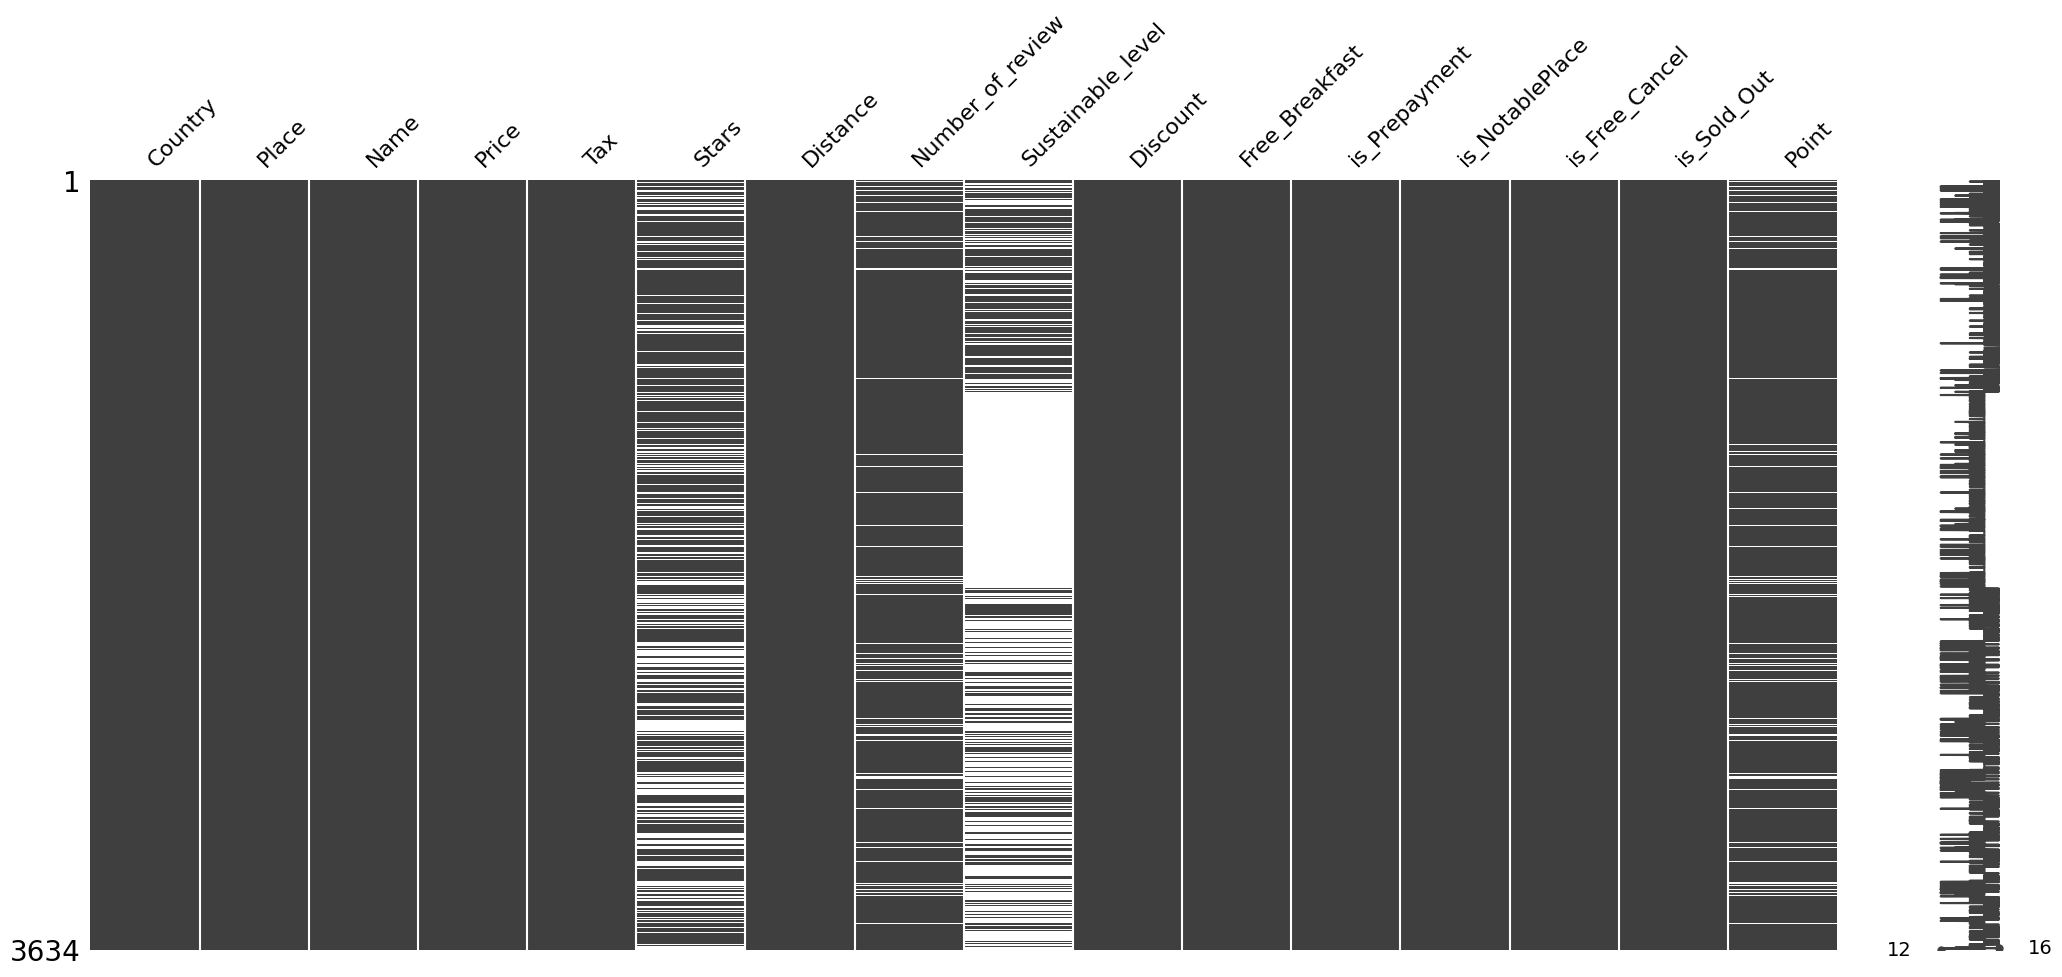

In [615]:
msno.matrix(df)

In [616]:
missing_ratio = df.isnull().sum() / len(df) * 100
missing_ratio_df = pd.DataFrame(missing_ratio, columns=['Missing Ratio'])
styled_missing_ratio = missing_ratio_df.style\
    .apply(lambda x: ['background: #89C6E9; color: black' if v > 0 else '' for v in x],
           axis=0)
# Hiển thị tỷ lệ giá trị thiếu với màu và chữ đen
print("Tỷ lệ giá trị thiếu trong mỗi cột:")
styled_missing_ratio

Tỷ lệ giá trị thiếu trong mỗi cột:


In [617]:
description = df.describe()
styled_description = description.style\
    .set_properties(**{'background-color': '#89C6E9', 'color': 'black', 'border-color': '#8b8c8c'})
styled_description

In [618]:
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def num_values(df):
    return df.nunique()
def value_ratios(c):
    return dict((c.value_counts(normalize=True) * 100).round(1))
df.agg([missing_ratio, num_values, value_ratios])

Country              Place  \
missing_ratio                  0.0                0.0   
num_values                       1                  1   
value_ratios   {'Viet Nam': 100.0}  {'Hà Nội': 100.0}   

                                                            Name  \
missing_ratio                                                0.0   
num_values                                                  1086   
value_ratios   {'Tunger Premium Hotel': 0.3, 'Hanoi Lullaby H...   

                                                           Price  \
missing_ratio                                                0.0   
num_values                                                  2201   
value_ratios   {'VND 600.000': 1.0, 'VND 400.000': 0.7, 'VND ...   

                                                             Tax  \
missing_ratio                                                0.0   
num_values                                                   138   
value_ratios   {'Đã bao gồm thuế và phí': 95.1, '+VND 75.000 ...   

                                                           Stars  \
missing_ratio                                               31.2   
num_values                                                     5   
value_ratios   {3.0: 44.3, 4.0: 37.1, 2.0: 10.9, 5.0: 5.0, 1....   

                                                        Distance  \
missing_ratio                                                0.0   
num_values                                                   131   
value_ratios   {'Cách trung tâm 0,8km': 7.1, 'Cách trung tâm ...   

                                                Number_of_review  \
missing_ratio                                                6.6   
num_values                                                   437   
value_ratios   {'1 đánh giá': 3.2, '2 đánh giá': 1.8, '3 đánh...   

                                               Sustainable_level  \
missing_ratio                                               63.7   
num_values                                                     3   
value_ratios   {'Du lịch Bền vững Cấp 3': 55.5, 'Du lịch Bền ...   

                                Discount             Free_Breakfast  \
missing_ratio                        0.0                        0.0   
num_values                             2                          2   
value_ratios   {False: 83.7, True: 16.3}  {False: 68.4, True: 31.6}   

                           is_Prepayment            is_NotablePlace  \
missing_ratio                        0.0                        0.0   
num_values                             2                          2   
value_ratios   {False: 70.7, True: 29.3}  {False: 77.4, True: 22.6}   

                          is_Free_Cancel                is_Sold_Out  \
missing_ratio                        0.0                        0.0   
num_values                             2                          2   
value_ratios   {False: 55.9, True: 44.1}  {False: 63.3, True: 36.7}   

                                                           Point  
missing_ratio                                                7.0  
num_values                                                    48  
value_ratios   {'8,4': 5.9, '8,5': 5.7, '8,7': 5.6, '9,0': 5....

In [619]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3634 entries, 0 to 6457
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            3634 non-null   object 
 1   Place              3634 non-null   object 
 2   Name               3634 non-null   object 
 3   Price              3634 non-null   object 
 4   Tax                3634 non-null   object 
 5   Stars              2499 non-null   float64
 6   Distance           3634 non-null   object 
 7   Number_of_review   3394 non-null   object 
 8   Sustainable_level  1319 non-null   object 
 9   Discount           3634 non-null   bool   
 10  Free_Breakfast     3634 non-null   bool   
 11  is_Prepayment      3634 non-null   bool   
 12  is_NotablePlace    3634 non-null   bool   
 13  is_Free_Cancel     3634 non-null   bool   
 14  is_Sold_Out        3634 non-null   bool   
 15  Point              3378 non-null   object 
dtypes: bool(6), float64(1), 

In [620]:
# Xử lý dữ liệu
# Tập dữ liệu hotel_test có 999 dòng
# Sau khi loại bỏ các dòng không có điểm đánh giá: còn 16190 
df.dropna(subset=['Point'], inplace=True)
print(df.info())
# Điền dữ liệu trống cho level = 0: 
df['Sustainable_level'].fillna(0, inplace=True)
print(df.info())
# Sau khi loại bỏ các dòng thiếu >1 thuộc tính: còn 15104 
# Tạo cột mới là số cột bị thiếu
df['Missing'] = df.isnull().sum(axis=1)
# xoá các hàng có số cột bị thiếu > 1
df = df[df['Missing'] <= 1]
df.drop(columns=['Missing'], inplace=True)  
print(df)
print(df.info())
df.to_csv(r'C:\Users\admind\Downloads\DuDoanGiaKhachSan\DuDoanGiaKhachSan\hotel_test_after.csv', index=False, encoding='utf-8-sig')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3378 entries, 0 to 6457
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            3378 non-null   object 
 1   Place              3378 non-null   object 
 2   Name               3378 non-null   object 
 3   Price              3378 non-null   object 
 4   Tax                3378 non-null   object 
 5   Stars              2458 non-null   float64
 6   Distance           3378 non-null   object 
 7   Number_of_review   3378 non-null   object 
 8   Sustainable_level  1275 non-null   object 
 9   Discount           3378 non-null   bool   
 10  Free_Breakfast     3378 non-null   bool   
 11  is_Prepayment      3378 non-null   bool   
 12  is_NotablePlace    3378 non-null   bool   
 13  is_Free_Cancel     3378 non-null   bool   
 14  is_Sold_Out        3378 non-null   bool   
 15  Point              3378 non-null   object 
dtypes: bool(6), float64(1), 

In [621]:
# Đọc file .csv vào DataFrame
df = pd.read_csv(r'C:\Users\admind\Downloads\DuDoanGiaKhachSan\DuDoanGiaKhachSan\hotel_test_after.csv')

In [622]:
df['Price'] = df['Price'].copy()
df["Price"].unique()

array(['VND 437.580', 'VND 658.944', 'VND 1.417.500', ..., 'VND 417.600',
       'VND 859.000', 'VND 619.200'], dtype=object)

In [623]:
# Xử lý thuộc tính "Price" bằng biểu thức chính quy
df['Price'] = df['Price'].apply(lambda x: re.sub(r'[^\d]+', '', x))
df['Price'] = df['Price'].astype(float)

In [624]:
df["Price"].unique()

array([ 437580.,  658944., 1417500., ...,  417600.,  859000.,  619200.])

In [625]:
df['Tax'].unique()

array(['Đã bao gồm thuế và phí', '+VND 100.000 thuế và phí',
       '+VND 294.500 thuế và phí', '+VND 17.842 thuế và phí',
       '+VND 48.804 thuế và phí', '+VND 43.642 thuế và phí',
       '+VND 356.500 thuế và phí', '+VND 469.495 thuế và phí',
       '+VND 87.284 thuế và phí', '+VND 75.000 thuế và phí',
       '+VND 57.720 thuế và phí', '+VND 325.500 thuế và phí',
       '+VND 49.977 thuế và phí', '+VND 541.725 thuế và phí',
       '+VND 88.223 thuế và phí', '+VND 60.536 thuế và phí',
       '+VND 334.800 thuế và phí', '+VND 48.335 thuế và phí',
       '+VND 60.750 thuế và phí', '+VND 59.832 thuế và phí',
       '+VND 355.725 thuế và phí', '+VND 63.117 thuế và phí',
       '+VND 59.363 thuế và phí', '+VND 418.500 thuế và phí',
       '+VND 487.553 thuế và phí', '+VND 209.250 thuế và phí',
       '+VND 20.184 thuế và phí', '+VND 255.750 thuế và phí',
       '+VND 372.000 thuế và phí', '+VND 81.000 thuế và phí',
       '+VND 558.000 thuế và phí', '+VND 76.050 thuế và phí',
       '+VN

In [626]:
# Xử lý thuộc tính "Tax"
# df['Tax'] = df['Tax'].str.extract('(\d+\.\d+|\d+)', expand=False) # Sử dụng biểu thức chính quy để tìm và lấy giá trị số trong chuỗi
df['Tax'] = df['Tax'].apply(lambda x: re.sub(r'[^\d]+', '', x))
df['Tax'] = df['Tax'].replace('', np.nan)
df['Tax'] = df['Tax'].astype(float)
# Điền dữ liệu NaN bằng giá trị 0
df['Tax'] = df['Tax'].fillna(0)

In [627]:
df['Tax'].unique()

array([      0.,  100000.,  294500.,   17842.,   48804.,   43642.,
        356500.,  469495.,   87284.,   75000.,   57720.,  325500.,
         49977.,  541725.,   88223.,   60536.,  334800.,   48335.,
         60750.,   59832.,  355725.,   63117.,   59363.,  418500.,
        487553.,  209250.,   20184.,  255750.,  372000.,   81000.,
        558000.,   76050.,  403000.,   21752.,   78750.,   26406.,
        319000.,  406100.,  172457.,   39600.,   50681., 1163468.,
        239093.,  327081.,   61944.,  240266.,   51150.,  330600.,
        613955.,   73206.,   50446.,  312768.,  195300.,  365490.,
        240501.,   57016.,  446400., 1012217.,  341000.,  172691.,
         58424.,   86400.,  324500.,  161500.,  496000.,   94429.,
         83182.,  457250.,  302691.,  513149.,  189875.,  300000.,
         71700.,   79198.,  385000.,   18316.,   33741.,   65608.,
        200000.,   60000.,   25104.,   61380.,   46394.,  150000.,
         69123.,   49909.,  516195.,   74278.,  100990.,   726

In [628]:
df['Distance'].unique()

array(['Cách trung tâm 3,2km', 'Cách trung tâm 0,9km',
       'Cách trung tâm 250m', 'Cách trung tâm 350m',
       'Cách trung tâm 450m', 'Cách trung tâm 0,8km',
       'Cách trung tâm 0,7km', 'Cách trung tâm 500m',
       'Cách trung tâm 4,4km', 'Cách trung tâm 5,4km',
       'Cách trung tâm 1,1km', 'Cách trung tâm 1km',
       'Cách trung tâm 0,5km', 'Cách trung tâm 0,6km',
       'Cách trung tâm 400m', 'Cách trung tâm 1,4km',
       'Cách trung tâm 6,4km', 'Cách trung tâm 8,1km',
       'Cách trung tâm 4,9km', 'Cách trung tâm 2,5km',
       'Cách trung tâm 5,1km', 'Cách trung tâm 3km',
       'Cách trung tâm 2,2km', 'Cách trung tâm 6,7km',
       'Cách trung tâm 2,3km', 'Cách trung tâm 4,1km',
       'Cách trung tâm 6,6km', 'Cách trung tâm 3,9km',
       'Cách trung tâm 2,9km', 'Cách trung tâm 4,8km',
       'Cách trung tâm 5km', 'Cách trung tâm 2km', 'Cách trung tâm 4,2km',
       'Cách trung tâm 3,6km', 'Cách trung tâm 4,5km',
       'Cách trung tâm 5,3km', 'Cách trung tâm 5,7km',

In [629]:
# Xử lý thuộc tính "Distance" bằng biểu thức chính quy
df['Distance'] = df['Distance'].str.extract(r'(\d+(?:,\d+)?)')
# Chuyển kiểu dữ liệu của thuộc tính "Distance" bằng kiểu Float
df['Distance'] = df['Distance'].str.replace(',', '.').astype(float)
# Chuẩn hoá dữ liệu của thuộc tính "Distance" về đơn vị km
df.loc[df['Distance'] >= 25, 'Distance'] /= 1000

In [630]:
df['Distance'].unique()

array([ 3.2   ,  0.9   ,  0.25  ,  0.35  ,  0.45  ,  0.8   ,  0.7   ,
        0.5   ,  4.4   ,  5.4   ,  1.1   ,  1.    ,  0.6   ,  0.4   ,
        1.4   ,  6.4   ,  8.1   ,  4.9   ,  2.5   ,  5.1   ,  3.    ,
        2.2   ,  6.7   ,  2.3   ,  4.1   ,  6.6   ,  3.9   ,  2.9   ,
        4.8   ,  5.    ,  2.    ,  4.2   ,  3.6   ,  4.5   ,  5.3   ,
        5.7   ,  1.3   ,  1.5   ,  6.9   ,  6.3   ,  8.3   ,  3.7   ,
        1.9   ,  4.7   ,  0.15  ,  1.8   ,  6.8   ,  4.    , 19.9   ,
        1.7   ,  5.2   ,  5.5   ,  7.9   ,  7.    ,  7.7   ,  0.3   ,
        3.4   ,  1.2   ,  7.8   , 19.8   ,  5.8   ,  0.0303,  3.5   ,
        8.6   ,  1.6   ,  5.6   , 22.4   ,  8.7   , 13.1   ,  6.2   ,
        2.1   ,  0.0462,  3.1   ,  6.5   ,  2.7   ,  0.0519,  7.5   ,
        7.4   , 22.3   , 11.6   ,  8.8   ,  7.1   ,  4.3   ,  6.1   ,
        2.6   , 10.3   ,  8.    ,  7.6   , 22.5   ,  9.7   ,  5.9   ,
        3.3   ,  6.    ,  7.2   ,  7.3   , 10.8   ,  2.8   ,  0.0331,
       22.1   ,  9.9

In [631]:
df['Number_of_review'].unique()

array(['8 đánh giá', '917 đánh giá', '1.073 đánh giá', '347 đánh giá',
       '456 đánh giá', '695 đánh giá', '1.938 đánh giá', '2.710 đánh giá',
       '92 đánh giá', '526 đánh giá', '190 đánh giá', '1.033 đánh giá',
       '115 đánh giá', '1.782 đánh giá', '692 đánh giá', '1.372 đánh giá',
       '323 đánh giá', '1.297 đánh giá', '73 đánh giá', '411 đánh giá',
       '895 đánh giá', '1.525 đánh giá', '1.038 đánh giá', '696 đánh giá',
       '480 đánh giá', '282 đánh giá', '408 đánh giá', '175 đánh giá',
       '146 đánh giá', '1.107 đánh giá', '263 đánh giá', '229 đánh giá',
       '405 đánh giá', '2 đánh giá', '27 đánh giá', '3 đánh giá',
       '451 đánh giá', '363 đánh giá', '1.911 đánh giá', '204 đánh giá',
       '932 đánh giá', '308 đánh giá', '95 đánh giá', '6 đánh giá',
       '172 đánh giá', '5 đánh giá', '64 đánh giá', '48 đánh giá',
       '170 đánh giá', '122 đánh giá', '995 đánh giá', '320 đánh giá',
       '89 đánh giá', '313 đánh giá', '77 đánh giá', '15 đánh giá',
   

In [632]:
# Xử lý thuộc tính "Number_of_review" bằng biểu thức chính quy
df['Number_of_review'] = df['Number_of_review'].str.extract(r'(\d+)')
df['Number_of_review'] = df['Number_of_review'].astype(int)

In [633]:
df['Number_of_review'].unique()

array([  8, 917,   1, 347, 456, 695,   2,  92, 526, 190, 115, 692, 323,
        73, 411, 895, 696, 480, 282, 408, 175, 146, 263, 229, 405,  27,
         3, 451, 363, 204, 932, 308,  95,   6, 172,   5,  64,  48, 170,
       122, 995, 320,  89, 313,  77,  15,  40, 728, 594, 350, 156,  38,
       736, 416, 314, 394, 716,  56, 324, 380,  10, 267, 112, 398, 279,
        69, 737, 433, 293, 278, 462,  63, 166,  17, 430, 189, 513,  26,
       387,  85,  34, 182, 276, 815, 686, 812, 586, 547, 246, 454, 431,
       981,  86,  35, 445, 284, 167,  74,  12, 184, 407, 473, 145, 107,
       349,  97, 209, 390, 537, 740, 315,  78, 573, 219, 469,  49, 183,
       678, 141, 147, 125, 236,  54, 489, 368, 113, 195, 519,  84, 152,
       328, 159, 385, 354, 653,  68, 610,  31, 111, 270, 709, 826, 636,
       244,  60,  62, 155, 381,  22, 258, 832, 388, 116, 521, 670, 576,
       298, 382, 162,  80, 100, 294,  42,  67, 192, 275, 247, 179,  87,
       285, 118,  23, 625, 472, 251, 264, 423, 325, 400,  11, 20

In [634]:
df['Sustainable_level'].unique()

array(['Du lịch Bền vững Cấp 2', 'Du lịch Bền vững Cấp 3',
       'Du lịch Bền vững Cấp 1', '0'], dtype=object)

In [635]:

# Xử lý thuộc tính "Sustainable_level" bằng biểu thức chính quy
df['Sustainable_level'] = df['Sustainable_level'].str.extract(r'(\d+)')
df['Sustainable_level'] = df['Sustainable_level'].astype(int)

In [636]:
df['Sustainable_level'].unique()

array([2, 3, 1, 0])

In [637]:
df['Point'].unique()

array(['8,3', '8,8', '9,0', '8,0', '8,1', '8,6', '8,9', '9,1', '9,2',
       '8,5', '8,7', '7,7', '8,4', '9,3', '10', '8,2', '6,3', '7,4',
       '9,5', '9,4', '9,8', '4,5', '7,3', '5,4', '7,6', '4,8', '7,8',
       '7,9', '6,8', '7,2', '7,5', '6,9', '9,6', '9,7', '9,9', '7,1',
       '6,0', '1,0', '6,7', '6,6', '7,0', '6,4', '6,2', '5,3', '5,0',
       '6,5', '4,0', '4,7'], dtype=object)

In [638]:
# Ép kiểu dữ liệu của cột "Point" về kiểu float
df['Point'] = df['Point'].str.replace(',', '.').astype(float)
lower_Point=df['Point'].mean() - 3* df['Point'].std()
df.loc[df['Point']<=lower_Point,'Point']=lower_Point

In [639]:
df['Point'].unique()

array([ 8.3       ,  8.8       ,  9.        ,  8.        ,  8.1       ,
        8.6       ,  8.9       ,  9.1       ,  9.2       ,  8.5       ,
        8.7       ,  7.7       ,  8.4       ,  9.3       , 10.        ,
        8.2       ,  6.3       ,  7.4       ,  9.5       ,  9.4       ,
        9.8       ,  5.85463638,  7.3       ,  7.6       ,  7.8       ,
        7.9       ,  6.8       ,  7.2       ,  7.5       ,  6.9       ,
        9.6       ,  9.7       ,  9.9       ,  7.1       ,  6.        ,
        6.7       ,  6.6       ,  7.        ,  6.4       ,  6.2       ,
        6.5       ])

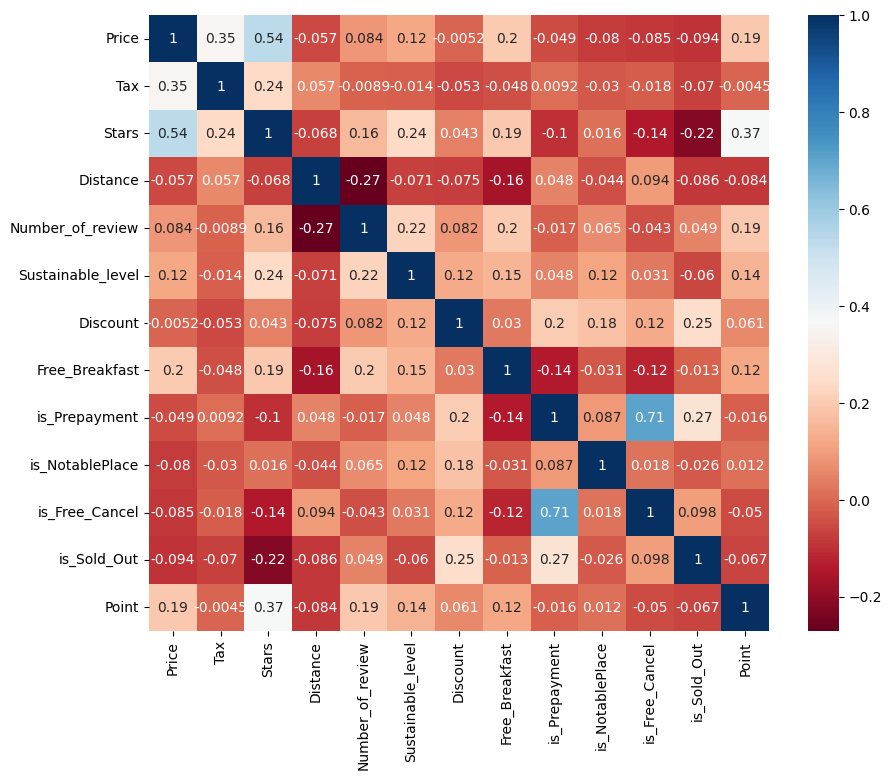

In [640]:
correlation_matrix = df.copy()
correlation_matrix = correlation_matrix.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu')  

plt.show()  


In [641]:
df = df[df['Number_of_review']>=25]
df.to_csv(r'C:\Users\admind\Downloads\DuDoanGiaKhachSan\DuDoanGiaKhachSan\DataHotel.csv', index=False)

In [642]:
df=pd.read_csv(r'C:\Users\admind\Downloads\DuDoanGiaKhachSan\DuDoanGiaKhachSan\DataHotel.csv')
df

Country   Place                                               Name  \
0     Viet Nam  Hà Nội           Hanoi Center Silk Classic Hotel & Travel   
1     Viet Nam  Hà Nội                                 Golden Villa Hotel   
2     Viet Nam  Hà Nội          22Land Residence Hotel & Spa 52 Ngo Huyen   
3     Viet Nam  Hà Nội                         Beryl Palace Hotel and Spa   
4     Viet Nam  Hà Nội                        Madelise Palace Hotel & Spa   
...        ...     ...                                                ...   
2539  Viet Nam  Hà Nội  RedDoorz Green Hotel Nguyen Van Ngoc near Lott...   
2540  Viet Nam  Hà Nội                      Old Quarter Apartment Hang Bo   
2541  Viet Nam  Hà Nội                         Hanoi All Nations Homestay   
2542  Viet Nam  Hà Nội  Chủ Nhật Cafe & Homestay - 12 ngõ 41 Đường Lán...   
2543  Viet Nam  Hà Nội                           Hanoi Central Star Hotel   

         Price      Tax  Stars  Distance  Number_of_review  Sustainable_level  \
0     658944.0      0.0    3.0      0.90               917                  3   
1     703000.0      0.0    3.0      0.35               347                  1   
2     760320.0      0.0    4.0      0.45               456                  0   
3     900000.0      0.0    4.0      0.80               695                  2   
4     580500.0      0.0    4.0      0.90                92                  3   
...        ...      ...    ...       ...               ...                ...   
2539  436294.0      0.0    2.0      4.30                89                  3   
2540  600000.0      0.0    NaN      0.70                44                  0   
2541  440100.0  44010.0    NaN      0.80                36                  3   
2542  417600.0      0.0    NaN      4.50               105                  2   
2543  315000.0      0.0    2.0      1.10                99                  0   

      Discount  Free_Breakfast  is_Prepayment  is_NotablePlace  \
0         True           False           True             True   
1         True            True           True             True   
2         True           False           True             True   
3         True            True           True             True   
4        False           False          False            False   
...        ...             ...            ...              ...   
2539     False           False          False            False   
2540     False           False           True            False   
2541     False           False          False            False   
2542     False           False          False            False   
2543     False           False          False            False   

      is_Free_Cancel  is_Sold_Out  Point  
0               True         True    8.8  
1               True         True    8.0  
2               True         True    8.1  
3               True        False    8.6  
4              False         True    9.2  
...              ...          ...    ...  
2539            True        False    7.5  
2540            True        False    7.5  
2541           False         True    9.4  
2542           False         True    8.6  
2543           False         True    8.2  

[2544 rows x 16 columns]